# TensorFlow.data

Note that for data preprocessing the function "Rot90" is included (as it is commonly used in Tensorflow) which is *NOT* used in any time measuring. As it can be seen, the computation is much faster as the function only rotates the image in a multiple of 90 degrees and does not include any interpolation of pixel values.

In [9]:
import tensorflow as tf
import numpy as np
import os
import time
import matplotlib.pyplot as plt

# Data Loading

In [10]:
data_dir = "data/train_small_npy"

labels_dict = np.load(os.path.join(data_dir, "labels.npy"), allow_pickle = True).item()
local_paths = list(labels_dict.keys())
global_paths = [os.path.join(data_dir, local_path) for local_path in local_paths]
labels = list(labels_dict.values())

In [11]:
dataset = tf.data.Dataset.from_tensor_slices((global_paths, labels))
print(dataset)

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>


In [12]:
for data, label in dataset.take(1):
    print("Data shape:", data.shape)
    print("Label shape:", label.shape)

Data shape: ()
Label shape: ()


In [13]:
def load_data(image_path, label):
    def load_np_file(path):
        return np.load(path.decode("utf-8"))

    image = image = tf.numpy_function(load_np_file, [image_path], tf.uint8)
    return image, label

dataset = dataset.map(load_data, num_parallel_calls=8)
print(dataset)

<_ParallelMapDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>


In [14]:
for data, label in dataset.take(3):
    print("Data shape:", data.shape)
    print(type(data))
    print("Label shape:", label.shape)
    print(type(label))

Data shape: (3, 1200, 2000)
<class 'tensorflow.python.framework.ops.EagerTensor'>
Label shape: ()
<class 'tensorflow.python.framework.ops.EagerTensor'>
Data shape: (3, 1200, 2000)
<class 'tensorflow.python.framework.ops.EagerTensor'>
Label shape: ()
<class 'tensorflow.python.framework.ops.EagerTensor'>
Data shape: (3, 1200, 2000)
<class 'tensorflow.python.framework.ops.EagerTensor'>
Label shape: ()
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [15]:
batch_size = 48
dataset = dataset.shuffle(buffer_size=len(global_paths)).batch(batch_size)
dataset = dataset.prefetch(buffer_size=len(global_paths))

In [16]:
#For time measuring
num_epochs = 5

start_time = time.time()
for epoch in range(num_epochs):
    epoch_start = time.time()
    for images, labels in dataset.as_numpy_iterator():
        pass
    epoch_end = time.time()
    epoch_time = epoch_end - epoch_start
    print(f"Epoch {epoch+1} done in {epoch_time} seconds.")
end_time = time.time()

total_time = end_time - start_time

print(f"Total time taken: {total_time} seconds")
print(f"Total time per epoch: {total_time/num_epochs} seconds")

2024-01-04 13:37:30.963564: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 779674033152 bytes after encountering the first element of size 345600192 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


Epoch 1 done in 13.156816005706787 seconds.


2024-01-04 13:37:44.454165: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 779674033152 bytes after encountering the first element of size 345600192 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


Epoch 2 done in 13.02345585823059 seconds.


2024-01-04 13:37:56.943321: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 779674033152 bytes after encountering the first element of size 345600192 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


Epoch 3 done in 12.93866777420044 seconds.


2024-01-04 13:38:10.303907: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 779674033152 bytes after encountering the first element of size 345600192 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


Epoch 4 done in 13.480473279953003 seconds.


2024-01-04 13:38:25.685018: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 779674033152 bytes after encountering the first element of size 345600192 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


Epoch 5 done in 15.528404235839844 seconds.
Total time taken: 68.12869548797607 seconds
Total time per epoch: 13.625739097595215 seconds


In [ ]:
#For validation, that Images are indeed loaded
num_epochs = 1
i = 0
start_time = time.time()
for epoch in range(num_epochs):
    for images, labels in dataset.as_numpy_iterator():
        
        if i < 10:
            #Display the first image for each batch
            single_image = images[0]
            plt.imshow(np.transpose(single_image, (1, 2, 0)))
            plt.show()
        i = i+1
    print(f"Epoch {epoch+1} done.")
end_time = time.time()

total_time = end_time - start_time

print(f"Total time taken: {total_time} seconds")
print(f"Total time per epoch: {total_time/num_epochs} seconds")

# Data Preprocessing

In [11]:
import tensorflow as tf
import numpy as np
import os
import time
import matplotlib.pyplot as plt

In [12]:
data_dir = "data/train_small_npy"

labels_dict = np.load(os.path.join(data_dir, "labels.npy"), allow_pickle = True).item()
local_paths = list(labels_dict.keys())
global_paths = [os.path.join(data_dir, local_path) for local_path in local_paths]
labels = list(labels_dict.values())

dataset = tf.data.Dataset.from_tensor_slices((global_paths, labels))

def load_data(image_path, label):
    def load_np_file(path):
        return np.load(path.decode("utf-8"))

    image = image = tf.numpy_function(load_np_file, [image_path], tf.uint8)
    return image, label

dataset = dataset.map(load_data, num_parallel_calls=8)

In [13]:
#ROT90 time
num_epochs = 5
batch_size = 48

def custom_transform(image):
    image = tf.transpose(image, perm=[1, 2, 0])
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    image = tf.image.random_crop(image, size=[500, 500, 3])
    image = tf.transpose(image, perm=[2, 0, 1])
    return image

transformed_dataset = dataset.map(lambda x, y: (custom_transform(x), y))

# For time measuring
start_time = time.time()
for epoch in range(num_epochs):
    epoch_start = time.time()
    for images, labels in transformed_dataset.batch(batch_size).as_numpy_iterator():
        images = images / 255.0
        pass

    epoch_end = time.time()
    epoch_time = epoch_end - epoch_start
    print(f"Epoch {epoch+1} done in {epoch_time} seconds.")
end_time = time.time()

total_time = end_time - start_time

print(f"Total time taken: {total_time} seconds")
print(f"Total time per epoch: {total_time/num_epochs} seconds")

Epoch 1 done in 69.55794405937195 seconds.
Epoch 2 done in 63.468257427215576 seconds.
Epoch 3 done in 67.73772549629211 seconds.
Epoch 4 done in 69.23349404335022 seconds.
Epoch 5 done in 66.9700698852539 seconds.
Total time taken: 336.96912455558777 seconds
Total time per epoch: 67.39382491111755 seconds


In [14]:
#REAL RANDOM TIME
from tensorflow.keras.layers import Input, RandomFlip, RandomRotation, RandomCrop
from tensorflow.keras.models import Model

num_epochs = 5
batch_size = 48

input_layer = Input(shape=(1200, 2000, 3), dtype=tf.float32)
x = RandomFlip("horizontal_and_vertical")(input_layer)
x = RandomRotation(factor=0.25, fill_mode="constant", fill_value = 0)(x)
x = RandomCrop(500, 500)(x)

data_augmentation_model = Model(inputs=input_layer, outputs=x)

def custom_transform_data(image, label):
    image = tf.transpose(image, perm=[1, 2, 0])
    image = data_augmentation_model(image)
    image = tf.cast(image, dtype=tf.float32) / 255.0
    image = tf.transpose(image, perm=[2, 0, 1])
    return image, label

transformed_dataset = dataset.map(custom_transform_data)

#For time measuring
start_time = time.time()
for epoch in range(num_epochs):
    epoch_start = time.time()
    for images, labels in transformed_dataset.batch(batch_size).as_numpy_iterator():
        pass
    epoch_end = time.time()
    epoch_time = epoch_end - epoch_start
    print(f"Epoch {epoch+1} done in {epoch_time} seconds.")
end_time = time.time()

total_time = end_time - start_time

print(f"Total time taken: {total_time} seconds")
print(f"Total time per epoch: {total_time/num_epochs} seconds")

Epoch 1 done in 282.5981996059418 seconds.
Epoch 2 done in 313.7625708580017 seconds.
Epoch 3 done in 333.0995740890503 seconds.
Epoch 4 done in 347.90150141716003 seconds.
Epoch 5 done in 354.28240442276 seconds.
Total time taken: 1631.6455495357513 seconds
Total time per epoch: 326.32910990715027 seconds


Transformed Image


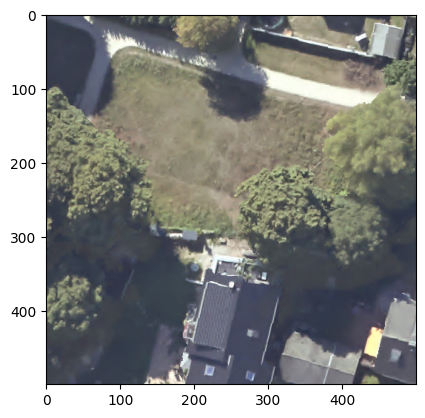

Transformed Image


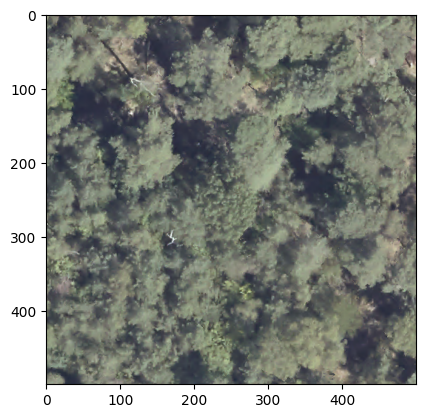

Transformed Image


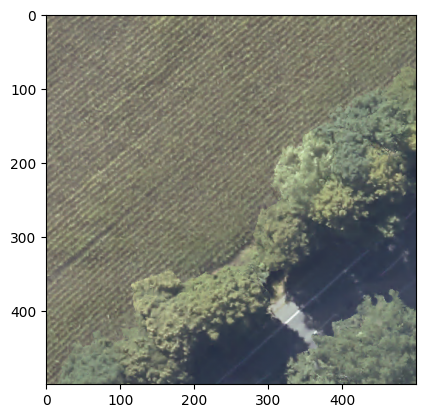

Transformed Image


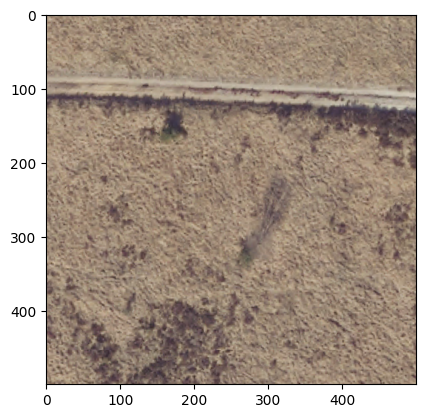

Transformed Image


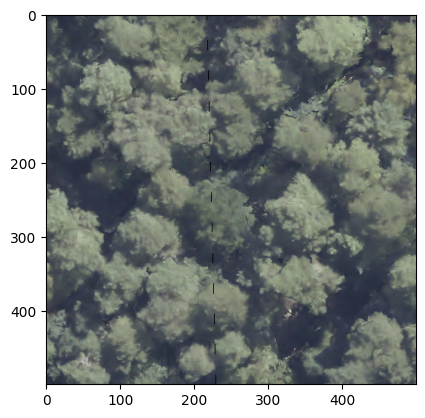

Transformed Image


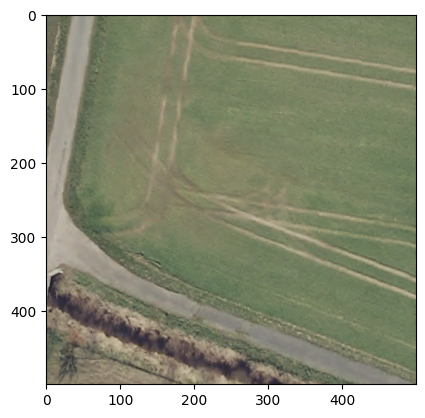

Transformed Image


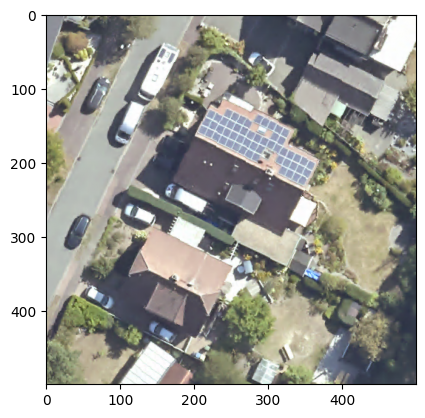

Transformed Image


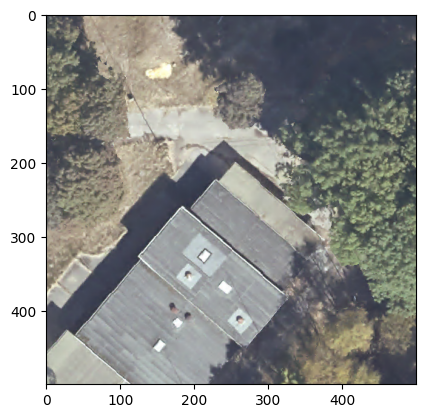

Transformed Image


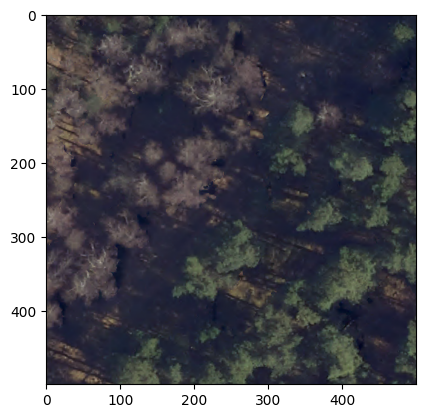

Transformed Image


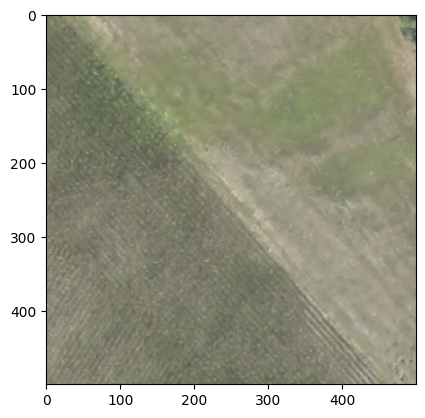

Epoch 1 done in 64.72268009185791 seconds.
Total time taken: 64.72310090065002 seconds
Total time per epoch: 64.72310090065002 seconds


In [15]:
#ROT90 validation
num_epochs = 1
batch_size = 48
    
def custom_transform(image):    
    image = tf.transpose(image, perm=[1, 2, 0])
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    image = tf.image.random_crop(image, size=[500, 500, 3])
    image = tf.transpose(image, perm=[2, 0, 1])
    return image

transformed_dataset = dataset.map(lambda x, y: (custom_transform(x), y))

#For validation
i = 0
start_time = time.time()
for epoch in range(num_epochs):
    epoch_start = time.time()
    for images, labels in transformed_dataset.batch(batch_size).as_numpy_iterator():
        images = images / 255.0
        if i < 10:
            print("Transformed Image")
            single_image = images[0]
            plt.imshow(np.transpose(single_image, (1, 2, 0)))
            plt.show()
        i = i+1
    epoch_end = time.time()
    epoch_time = epoch_end - epoch_start
    print(f"Epoch {epoch+1} done in {epoch_time} seconds.")
end_time = time.time()

total_time = end_time - start_time

print(f"Total time taken: {total_time} seconds")
print(f"Total time per epoch: {total_time/num_epochs} seconds")

Transformed Image


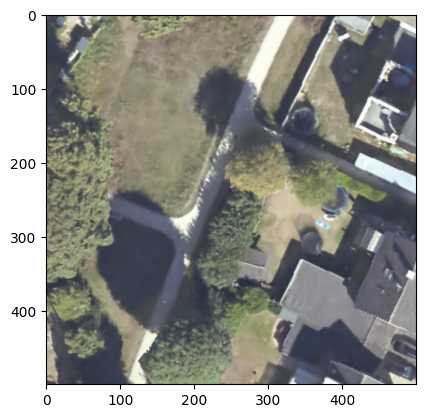

Transformed Image


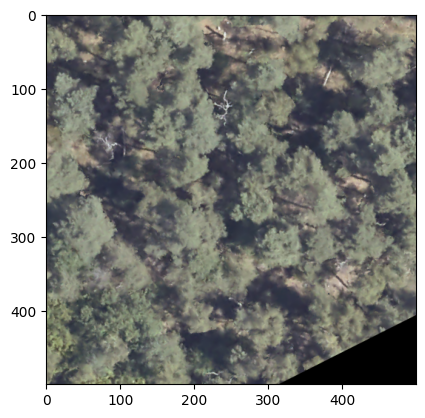

Transformed Image


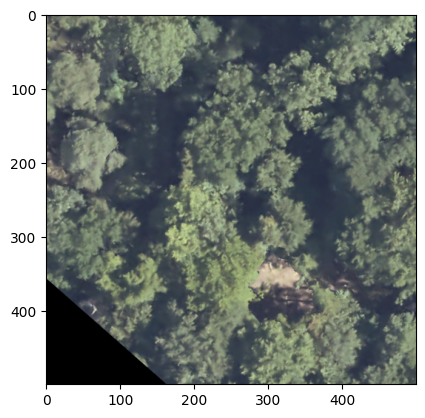

Transformed Image


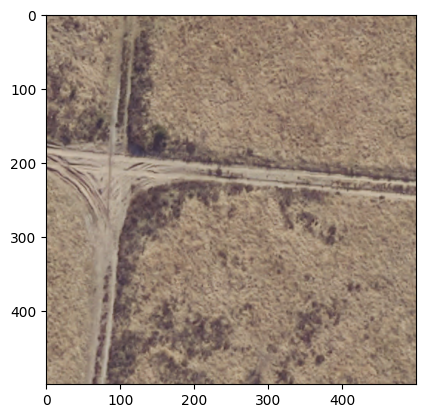

Transformed Image


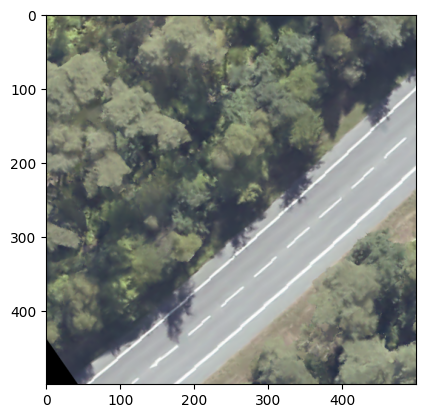

Transformed Image


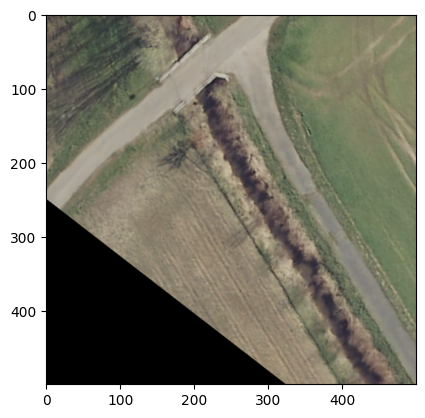

Transformed Image


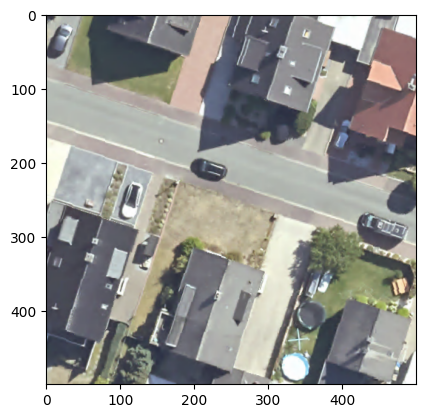

Transformed Image


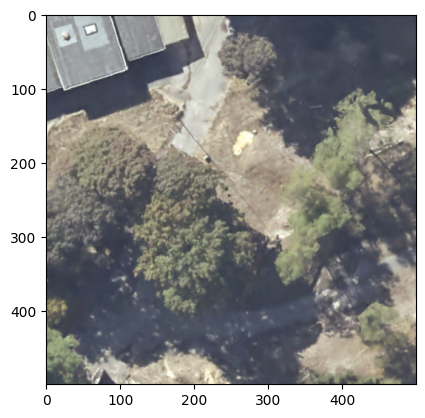

Transformed Image


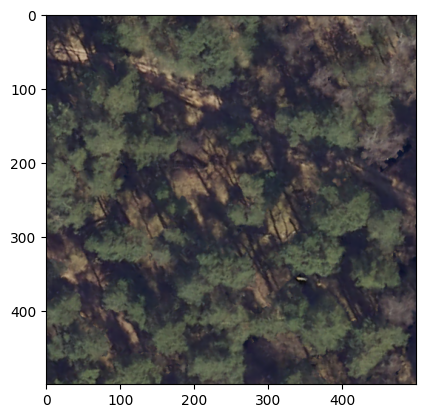

Transformed Image


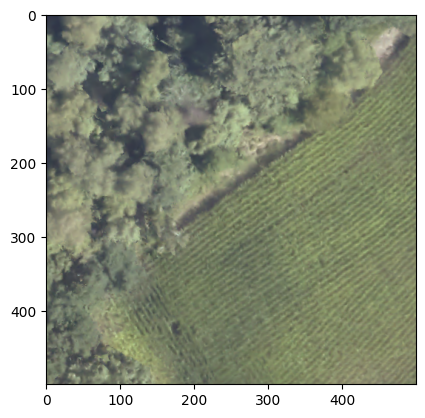

Epoch 1 done in 345.6198766231537 seconds.
Total time taken: 345.62043356895447 seconds
Total time per epoch: 345.62043356895447 seconds


In [16]:
#REAL RANDOM ROTATION validation
from tensorflow.keras.layers import Input, RandomFlip, RandomRotation, RandomCrop
from tensorflow.keras.models import Model

num_epochs = 1
batch_size = 48

input_layer = Input(shape=(1200, 2000, 3), dtype=tf.float32)
x = RandomFlip("horizontal_and_vertical")(input_layer)
x = RandomRotation(factor=0.25, fill_mode="constant", fill_value=0)(x)
x = RandomCrop(500, 500)(x)

data_augmentation_model = Model(inputs=input_layer, outputs=x)

def custom_transform_data(image, label):
    image = tf.transpose(image, perm=[1, 2, 0])
    image = data_augmentation_model(image)
    image = tf.cast(image, dtype=tf.float32) / 255.0
    image = tf.transpose(image, perm=[2, 0, 1])
    return image, label

transformed_dataset = dataset.map(custom_transform_data)

#For validation
i = 0
start_time = time.time()
for epoch in range(num_epochs):
    epoch_start = time.time()
    for images, labels in transformed_dataset.batch(batch_size).as_numpy_iterator():
        if i < 10:
            print("Transformed Image")
            single_image = images[0]
            plt.imshow(np.transpose(single_image, (1, 2, 0)))
            plt.show()
        i = i+1
    epoch_end = time.time()
    epoch_time = epoch_end - epoch_start
    print(f"Epoch {epoch+1} done in {epoch_time} seconds.")
end_time = time.time()

total_time = end_time - start_time

print(f"Total time taken: {total_time} seconds")
print(f"Total time per epoch: {total_time/num_epochs} seconds")

# Machine Learning

## Rot90 Model

In [17]:
class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(3, 500, 500))
        self.pool1 = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2))
        self.conv2 = tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu')
        self.pool2 = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2))
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(200, activation='relu')
        self.fc2 = tf.keras.layers.Dense(1)

    def call(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

model = Model()

criterion = tf.keras.losses.MeanSquaredError()
optimizer = tf.optimizers.Adam(learning_rate=0.001)

In [18]:
num_epochs = 5
batch_size = 48

start_time = time.time()
for epoch in range(num_epochs):
    epoch_start = time.time()
    
    for images, labels in transformed_dataset.batch(batch_size).as_numpy_iterator():
        images = images / 255.00
        with tf.GradientTape() as tape:
            outputs = model(images)
            labels = tf.convert_to_tensor(labels.reshape(-1, 1), dtype=tf.float32)
            loss = criterion(labels, outputs)
        
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    epoch_end = time.time()
    epoch_time = epoch_end - epoch_start
    print(f"Epoch {epoch + 1} done in {epoch_time} seconds.")
end_time = time.time()

total_time = end_time - start_time

print(f"Total time taken: {total_time} seconds")
print(f"Total time per epoch: {total_time/num_epochs} seconds")

Epoch 1 done in 347.0880162715912 seconds.
Epoch 2 done in 361.9549148082733 seconds.
Epoch 3 done in 369.60846304893494 seconds.
Epoch 4 done in 307.0987446308136 seconds.
Epoch 5 done in 299.0494465827942 seconds.
Total time taken: 1684.8008313179016 seconds
Total time per epoch: 336.96016626358033 seconds


In [19]:
test_images_list = []
true_labels_list = []

labels = np.load("data/train_small_npy/labels.npy", allow_pickle=True).item()

def custom_transform(image):
    image = tf.transpose(image, perm=[1, 2, 0])
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    image = tf.cast(image, tf.float32)
    image = tf.image.random_crop(image, size=[500, 500, 3])
    image = tf.transpose(image, perm=[2, 0, 1])
    return image

for i in range(3):
    for j in range(3):
        image = np.load(f"data/train_small_npy/part_{i}_{j}.npy")
        test_images_list.append(image)

        true_label = labels[f"part_{i}_{j}.npy"]
        true_labels_list.append(true_label)

test_images = np.stack(test_images_list)
true_labels = np.stack(true_labels_list)


test_images = np.stack([custom_transform(image) for image in test_images])
test_images /= 255.0
outputs = model(test_images)

for i in range(len(test_images)):
    predicted_label = outputs[i].numpy()
    true_label = true_labels[i]

    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")

True Label: 32.300029075730365, Predicted Label: [0.23493151]
True Label: 48.703060020484344, Predicted Label: [0.23493151]
True Label: 45.16200319928004, Predicted Label: [0.23493151]
True Label: 43.05451105177395, Predicted Label: [0.23493151]
True Label: 50.53783853078554, Predicted Label: [0.23493151]
True Label: 20.70055566802592, Predicted Label: [0.23493151]
True Label: 22.437885643530564, Predicted Label: [0.23493151]
True Label: 57.85933785886005, Predicted Label: [0.23493151]
True Label: 35.674668388114085, Predicted Label: [0.23493151]


## Real Data Preprocessing

In [20]:
class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(3, 500, 500))
        self.pool1 = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2))
        self.conv2 = tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu')
        self.pool2 = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2))
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(200, activation='relu')
        self.fc2 = tf.keras.layers.Dense(1)

    def call(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

model = Model()

criterion = tf.keras.losses.MeanSquaredError()
optimizer = tf.optimizers.Adam(learning_rate=0.001)

In [21]:
from tensorflow.keras.layers import Input, RandomFlip, RandomRotation, RandomCrop
from tensorflow.keras.models import Model

num_epochs = 5
batch_size = 48

input_layer = Input(shape=(1200, 2000, 3), dtype=tf.float32)
x = RandomFlip("horizontal_and_vertical")(input_layer)
x = RandomRotation(factor=0.25, fill_mode="constant", fill_value = 0)(x)
x = RandomCrop(500, 500)(x)

data_augmentation_model = Model(inputs=input_layer, outputs=x)

def custom_transform_data(image, label):
    image = tf.transpose(image, perm=[1, 2, 0])
    image = data_augmentation_model(image)
    image = tf.cast(image, dtype=tf.float32) / 255.0
    image = tf.transpose(image, perm=[2, 0, 1])
    return image, label

transformed_dataset = dataset.map(custom_transform_data)

#For time measuring
start_time = time.time()
for epoch in range(num_epochs):
    epoch_start = time.time()
    for images, labels in transformed_dataset.batch(batch_size).as_numpy_iterator():
        with tf.GradientTape() as tape:
            outputs = model(images)
            labels = tf.convert_to_tensor(labels.reshape(-1, 1), dtype=tf.float32)
            loss = criterion(labels, outputs)
        
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    epoch_end = time.time()
    epoch_time = epoch_end - epoch_start
    print(f"Epoch {epoch+1} done in {epoch_time} seconds.")
end_time = time.time()

total_time = end_time - start_time

print(f"Total time taken: {total_time} seconds")
print(f"Total time per epoch: {total_time/num_epochs} seconds")

Epoch 1 done in 612.1385984420776 seconds.
Epoch 2 done in 709.6222674846649 seconds.
Epoch 3 done in 632.7126455307007 seconds.
Epoch 4 done in 503.9971604347229 seconds.
Epoch 5 done in 659.6941215991974 seconds.
Total time taken: 3118.166055202484 seconds
Total time per epoch: 623.6332110404968 seconds


In [22]:
test_images_list = []
true_labels_list = []

labels = np.load("data/train_small_npy/labels.npy", allow_pickle=True).item()

def custom_transform(image):
    image = tf.transpose(image, perm=[1, 2, 0])
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    image = tf.cast(image, tf.float32)
    image = tf.image.random_crop(image, size=[500, 500, 3])
    image = tf.transpose(image, perm=[2, 0, 1])
    return image

for i in range(3):
    for j in range(3):
        image = np.load(f"data/train_small_npy/part_{i}_{j}.npy")
        test_images_list.append(image)

        true_label = labels[f"part_{i}_{j}.npy"]
        true_labels_list.append(true_label)

test_images = np.stack(test_images_list)
true_labels = np.stack(true_labels_list)


test_images = np.stack([custom_transform(image) for image in test_images])
test_images /= 255.0
outputs = model(test_images)

for i in range(len(test_images)):
    predicted_label = outputs[i].numpy()
    true_label = true_labels[i]

    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")

True Label: 32.300029075730365, Predicted Label: [0.23493151]
True Label: 48.703060020484344, Predicted Label: [0.23493151]
True Label: 45.16200319928004, Predicted Label: [0.23493151]
True Label: 43.05451105177395, Predicted Label: [0.23493151]
True Label: 50.53783853078554, Predicted Label: [0.23493151]
True Label: 20.70055566802592, Predicted Label: [0.23493151]
True Label: 22.437885643530564, Predicted Label: [0.23493151]
True Label: 57.85933785886005, Predicted Label: [0.23493151]
True Label: 35.674668388114085, Predicted Label: [0.23493151]
